In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [48]:
df=pd.read_csv('parkinsons_data.csv')
df.isna().sum()
df.duplicated()
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [49]:
df = df.drop(columns=['name'])

In [50]:
X = df.drop(columns=['status']).values
y = df['status'].values
scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)
X_scaler

array([[-0.82929965, -0.43616456, -0.95203729, ...,  0.48047686,
        -0.21053082,  0.86888575],
       [-0.77097169, -0.53097409, -0.05772056, ...,  1.31118546,
         0.27507712,  1.80360503],
       [-0.90947638, -0.7231683 , -0.10987483, ...,  1.01768236,
        -0.10362861,  1.40266141],
       ...,
       [ 0.49557839,  0.47010361, -0.96839309, ..., -0.81807931,
         0.78033848, -0.83241014],
       [ 1.07876114,  2.19004398, -0.95417967, ..., -0.22906571,
        -0.63700298, -0.92610456],
       [ 1.45481664,  0.69224632, -0.88348115, ..., -0.43085284,
         0.45480231, -0.64505466]])

In [51]:
# Apply PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaler)

# Create a DataFrame for the PCA results
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Status'] = y

print("\nExplained Variance Ratio (2 Components):")
print(pca.explained_variance_ratio_)


Explained Variance Ratio (2 Components):
[0.58900504 0.1129943 ]


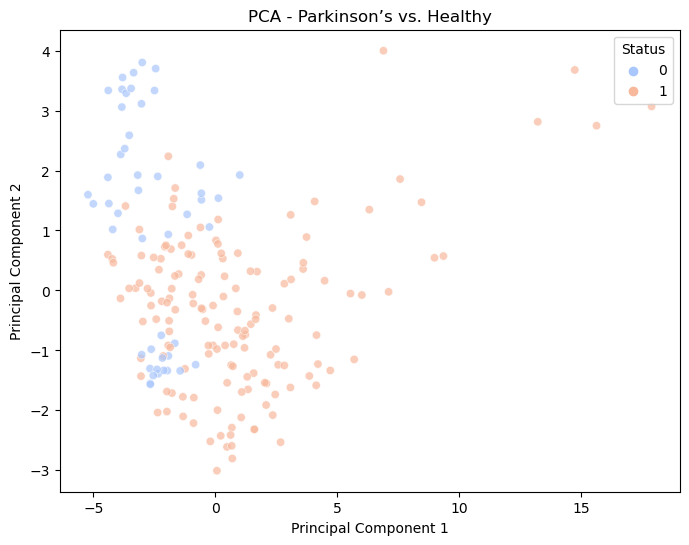

In [52]:
# Plot the PCA-transformed data
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Status', data=df_pca, palette='coolwarm', alpha=0.7)
plt.title('PCA - Parkinson’s vs. Healthy')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

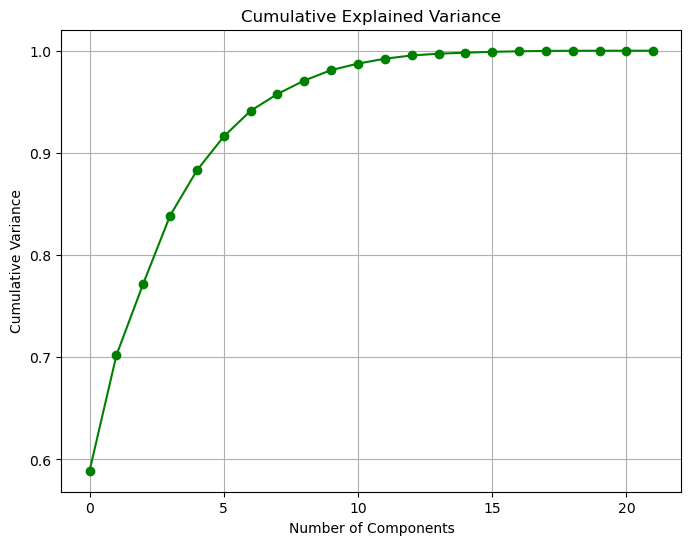

In [53]:
# Apply PCA with all components to see the variance
pca_full = PCA().fit(X_scaler)
# Scree Plot: Cumulative Explained Variance
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o', linestyle='-', color='g')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.grid(True)
plt.show()

In [54]:

print("\nExplained Variance Ratio for Each Component:")
print(pca_full.explained_variance_ratio_)


Explained Variance Ratio for Each Component:
[5.89005041e-01 1.12994301e-01 7.00922613e-02 6.65902818e-02
 4.42689134e-02 3.31412915e-02 2.51020405e-02 1.64728788e-02
 1.31744611e-02 1.01875582e-02 6.38932478e-03 4.76551508e-03
 3.16986041e-03 1.73483094e-03 1.00053149e-03 8.08524478e-04
 5.66199903e-04 3.27915264e-04 1.58934882e-04 4.93161572e-05
 1.64470280e-08 1.50562914e-09]
